### THE SPARKS FOUNDATION

#### GRIP - GRADUATION ROTATIONAL INTERNSHIP PROGRAM

### NAME - ANJALI DUBEY

### TASK 4 - Exploratory Data Analysis - Global Terrorism 

In [1]:
# Importing Numeric Python
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Data Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm+
import seaborn as sns
import plotly.express as px

# Filter warning
from warnings import filterwarnings
filterwarnings('ignore')

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Linear Regression Libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Regularization Technique
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# GridSearch and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
df1 = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859–1')

In [3]:
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Getting to know the data

In [4]:
df1.shape

(181691, 135)

In [5]:
df1.size

24528285

In [6]:
df1.describe()  #GETTING SUMMARY STATISTICS OF ALL THE NUMERICAL COLUMNS

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df1.describe(include='O') #GETTING THE SUMMARY STATISTICS OF ALL THE CATEGORICAL VARIABLES

,approxdate,resolution,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,...,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
count,9239,2220,181691,181691,181270,181257,55495,115562,29011,181691,...,324,3305,514,10991,28289,115500,76933,43516,181691,25038
unique,2244,1859,205,12,2855,36674,44109,112492,5,9,...,143,217,387,7,15429,83988,62263,36090,26,14306
top,"September 18-24, 2016",8/4/1998,Iraq,Middle East & North Africa,Baghdad,Unknown,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",Insurgency/Guerilla Action,Bombing/Explosion,...,Unknown,Colombia,0,Unknown,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,"201612010023, 201612010024, 201612010025, 2016..."
freq,101,18,24636,50474,7645,9775,142,100,23410,88255,...,27,687,36,3606,1607,205,134,139,78002,80


In [12]:
df1.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [13]:
df1.duplicated().sum()

0

### DATA DICTIONARY :

In [14]:
#eventid --> A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential
#iyear --> This field contains the year in which the incident occurred.
#imonth --> This field contains the number of the month in which the incident occurred.
#idate --> This field contains the numeric day of the month on which the incident occurred.
#approxdate --> None
#extended --> 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less
#resolution --> on which date conflict got resolved
#country --> This field identifies the country code
#country_txt --> This field identifies the country or location where the incident occurred.
#region --> This field identifies the region code based on 12 regions
#region_txt --> This field identifies the region in which the incident occurred.
#provstate --> Name (at the time of event) of the 1st order subnational administrative region
#city --> Name of the city, village, or town in which the incident occurred
#latitude --> The latitude of the city in which the event occurred.
#longitude --> The longitude of the city in which the event occurred.
#specificity --> It is related to the location details of the incident like latitude and longitude
#nkill --> The number of total confirmed fatalities for the incident
#nkillus --> number of us citizen died
#nperps --> The total number of terrorists participating in the incident
#success --> Success of a terrorist strike
#suicide --> 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide
#attacktype1 --> The general method of attack
#attacktype1_txt --> The general method of attack and broad class of tactics used.
#targtype1 --> The general type of target/victim
#targtype1_txt -->The general type of target/victim
#targsubtype_txt --> The more specific target category
#target1 --> The specific person, building, installation that was targeted and/or victimized
#natlty1 --> The nationality of the target that was attacked
#natlty1_txt -- > The nationality of the target that was attacked
#gname -->The name of the group that carried out the attack
#guncertain --> if gun was involved or not
#weapontype_txt --> General type of weapon used in the incident
#weaponsubtype1_txt --> More specific value for most of the Weapon Types

In [15]:
#HANDLING NULL VALUES
null_value_df = pd.DataFrame()
null_value_data_list = list(df1.isnull().sum()/len(df1)*100)
null_value_df['Columns'] = df1.columns
null_value_df['Null Value'] = null_value_data_list
null_value_df.head()

,Columns,Null Value
0,eventid,0.000000
1,iyear,0.000000
2,imonth,0.000000
3,iday,0.000000
4,approxdate,94.914993


#### COLUMNS CONTAINING MORE THAN 99% NULL VALUES

In [16]:
null_value_df.loc[null_value_df['Null Value']>99]

,Columns,Null Value
32,attacktype3,99.764435
33,attacktype3_txt,99.764435
50,targtype3,99.352747
51,targtype3_txt,99.352747
52,targsubtype3,99.396228
53,targsubtype3_txt,99.396228
54,corp3,99.435305
55,target3,99.353298
56,natlty3,99.368708
57,natlty3_txt,99.368708


In [17]:
null_value_df.loc[null_value_df['Null Value']>99].count()

Columns       31
Null Value    31
dtype: int64

In [18]:
#THERE ARE 31 COLUMNS THAT CONTAINS MORE THAN 99%.THESE COLUMNS WOULD NOT BE NECESSARY FOR OUR ANALYSIS SO LATER ON ,
#WE CAN DROP THESE COLUMNS IF NEEDED 

#### COLUMNS WHICH DON'T HAVE ANY NULL VALUES

In [19]:
null_value_df.loc[null_value_df['Null Value']==0]

,Columns,Null Value
0,eventid,0.0
1,iyear,0.0
2,imonth,0.0
3,iday,0.0
5,extended,0.0
7,country,0.0
8,country_txt,0.0
9,region,0.0
10,region_txt,0.0
16,vicinity,0.0


In [20]:
null_value_df.loc[null_value_df['Null Value']==0].count()

Columns       29
Null Value    29
dtype: int64

In [21]:
#THERE ARE 29 COLUMNS WHICH DON'T HAVE ANY NULL VALUES.PROBABLY THESE COLUMNS WOULD BE HELPFUL IN OUR ANALYSIS

In [22]:
# PERCENTAGE OF VALUE IS NULL IN LATITUDE AND LONGITUDE COLUMN
null_value_df[(null_value_df['Columns']=='latitude')| (null_value_df['Columns']=='longitude')]
#THERE ARE SLIGHTLY MORE NULL VALUES IN LONGITUDE COLUMNS THEN LATITUDE

,Columns,Null Value
13,latitude,2.507554
14,longitude,2.508104


In [23]:
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [24]:
# DAY AND MONTH COLUMN IS SOMETIMES HAVING 0 AS A VALUE WHICH DOES'NT MAKE ANY SENSE SO WE ARE GOING TO REPLACE THAT WITH 1.

In [25]:
df1['iday'].replace(to_replace= 0, value = 1 ,inplace =True)
df1['imonth'].replace(to_replace= 0 ,value= 1 ,inplace= True)

In [26]:
df1.head()  #VALUES ARE REPLACED SUCCESSFULLY

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,1,1,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,1,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,1,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,1,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [27]:
# DROPPING ALL THE UNNECESSARY COLUMNS WHICH WE'LL NOT BE USING IN OUR ANALYSIS

In [28]:
drop2_columns = list(null_value_df.tail(20)['Columns'])
df1.drop(drop2_columns,axis = 1,inplace = True)

drop3_columns = list(null_value_df.iloc[42:57]['Columns'])
df1.drop(drop3_columns,axis = 1,inplace = True)

drop4_columns = list(null_value_df.iloc[85:97]['Columns'])
df1.drop(drop4_columns,axis = 1,inplace = True)

drop5_columns = list(null_value_df.iloc[59:65]['Columns'])
df1.drop(drop5_columns,axis = 1,inplace = True)

drop6_columns = list(null_value_df.iloc[74:81]['Columns'])
df1.drop(drop6_columns,axis = 1,inplace = True)

drop7_columns = ['nkillus','nwoundus','propcomment','divert','nhostkidus','guncertain2','guncertain3','nperpcap']
df1.drop(drop7_columns,axis = 1,inplace = True)

drop8_columns = ['nhours','ndays','natlty3_txt','weapdetail']
df1.drop(drop8_columns,axis = 1,inplace = True)

drop9_columns = ['specificity','multiple','individual','nperps']
df1.drop(drop9_columns,axis = 1,inplace = True)

drop10_columns = ['claimmode']
df1.drop(drop10_columns,axis = 1,inplace = True)

drop11_columns = ['natlty1']
df1.drop(drop11_columns,axis = 1,inplace = True)

In [29]:
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,1.0,NaN,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN
1,197000000002,1970,1,1,NaN,0,NaN,130,Mexico,1,...,0.0,NaN,0.0,NaN,0,NaN,NaN,NaN,1.0,1.0
2,197001000001,1970,1,1,NaN,0,NaN,160,Philippines,5,...,1.0,NaN,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN
3,197001000002,1970,1,1,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,NaN
4,197001000003,1970,1,1,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,NaN


In [30]:
#NUMBER OF KIDS HOSTAGE
null_value_df[null_value_df['Columns'] == 'nhostkid']

,Columns,Null Value
110,nhostkid,92.530175


In [31]:
#WE HAVE TO REPLACE NULL VALUES WITH 0 WHICH REPRESENTS 0 KIDS HOSTAGE

In [32]:
df1['nhostkid'].fillna(0,inplace =True)
df1['nhostkid'].isnull().sum()   

0

In [33]:
#PROPERTY COLUMN NULL VALUES HANDLING

In [34]:
prop = df1[['property','propextent','propextent_txt','propvalue']] #COLUMNS RELATED TO PROPERTY

In [35]:
print('Number of property Columns : ',prop.columns)
prop

Number of property Columns :  Index(['property', 'propextent', 'propextent_txt', 'propvalue'], dtype='object')


,property,propextent,propextent_txt,propvalue
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,1,NaN,NaN,NaN
4,1,NaN,NaN,NaN
...,...,...,...,...
181686,-9,NaN,NaN,NaN
181687,1,4.0,Unknown,-99.0
181688,1,4.0,Unknown,-99.0
181689,-9,NaN,NaN,NaN


In [36]:
#WE'LL REPLACE NULL VALUES TO 0 WHEN THERE WILL BE NO DESTRUCTION AT ANY PROPERTY

In [37]:
x = prop[prop['property']==0]['propvalue'].fillna(value = 0,inplace = True)
x

In [38]:
null_value_df.iloc[107]

Columns       propvalue
Null Value    78.541039
Name: 107, dtype: object

In [39]:
df1[df1['attacktype1']==1]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,1.0,NaN,0.0,NaN,0,NaN,NaN,NaN,0.0,0.0
2,197001000001,1970,1,1,NaN,0,NaN,160,Philippines,5,...,1.0,NaN,0.0,NaN,0,NaN,NaN,NaN,0.0,0.0
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,0.0,NaN,0.0,NaN,0,NaN,NaN,NaN,0.0,0.0
25,197001200001,1970,1,20,NaN,0,NaN,83,Guatemala,2,...,1.0,NaN,0.0,NaN,0,NaN,NaN,NaN,0.0,0.0
111,197003050003,1970,3,5,NaN,0,NaN,217,United States,1,...,2.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181561,201712270002,2017,12,27,NaN,0,NaN,95,Iraq,10,...,3.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0
181568,201712270010,2017,12,27,NaN,0,NaN,4,Afghanistan,6,...,1.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0
181569,201712270011,2017,12,27,NaN,0,NaN,4,Afghanistan,6,...,0.0,0.0,2.0,0.0,0,NaN,NaN,NaN,0.0,0.0
181572,201712270014,2017,12,28,NaN,0,NaN,160,Philippines,5,...,1.0,0.0,1.0,0.0,0,NaN,NaN,NaN,0.0,0.0


In [40]:
pd.crosstab(df1['attacktype1_txt'] , df1['propextent_txt'])

propextent_txt,Catastrophic (likely >= $1 billion),Major (likely >= $1 million but < $1 billion),Minor (likely < $1 million),Unknown
attacktype1_txt,,,,
Armed Assault,0,66,6896,5487
Assassination,0,0,2273,508
Bombing/Explosion,2,605,26768,10854
Facility/Infrastructure Attack,0,205,5486,1504
Hijacking,4,2,165,49
Hostage Taking (Barricade Incident),0,15,317,197
Hostage Taking (Kidnapping),0,9,856,546
Unarmed Assault,0,1,138,36
Unknown,0,6,405,665


In [41]:
pd.pivot_table(data=df1,values = 'propvalue',index=['attacktype1_txt','propextent_txt'],aggfunc='count')

propvalue
attacktype1_txt                     propextent_txt                                          
Armed Assault                       Major (likely >= $1 million but < $1 billion)         29
                                    Minor (likely < $1 million)                         5698
                                    Unknown                                              948
Assassination                       Minor (likely < $1 million)                         1764
                                    Unknown                                              132
Bombing/Explosion                   Catastrophic (likely >= $1 billion)                    2
                                    Major (likely >= $1 million but < $1 billion)        237
                                    Minor (likely < $1 million)                        19243
                                    Unknown                                             3830
Facility/Infrastructure Attack      Major (likely >= $1 million but < $1 billion)        128
                                    Minor (likely < $1 million)                         4225
                                    Unknown                                              642
Hijacking                           Catastrophic (likely >= $1 billion)                    0
                                    Major (likely >= $1 million but < $1 billion)          1
                                    Minor (likely < $1 million)                          151
                                    Unknown                                               22
Hostage Taking (Barricade Incident) Major (likely >= $1 million but < $1 billion)         14
                                    Minor (likely < $1 million)                          300
                                    Unknown                                               40
Hostage Taking (Kidnapping)         Major (likely >= $1 million but < $1 billion)          4
                                    Minor (likely < $1 million)                          765
                                    Unknown                                              177
Unarmed Assault                     Major (likely >= $1 million but < $1 billion)          1
                                    Minor (likely < $1 million)                          113
                                    Unknown                                                9
Unknown                             Major (likely >= $1 million but < $1 billion)          4
                                    Minor (likely < $1 million)                          346
                                    Unknown                                              154

In [42]:
pd.pivot_table(data=df1,values = 'propvalue',index=['attacktype1_txt','propextent_txt'],aggfunc='median')

propvalue
attacktype1_txt                     propextent_txt                                             
Armed Assault                       Major (likely >= $1 million but < $1 billion)  1.400000e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Assassination                       Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Bombing/Explosion                   Catastrophic (likely >= $1 billion)            1.889560e+09
                                    Major (likely >= $1 million but < $1 billion)  1.864019e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Facility/Infrastructure Attack      Major (likely >= $1 million but < $1 billion)  2.250000e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Hijacking                           Major (likely >= $1 million but < $1 billion)  1.000000e+07
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Hostage Taking (Barricade Incident) Major (likely >= $1 million but < $1 billion)  2.188020e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Hostage Taking (Kidnapping)         Major (likely >= $1 million but < $1 billion)  1.000000e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Unarmed Assault                     Major (likely >= $1 million but < $1 billion)  1.245500e+06
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01
Unknown                             Major (likely >= $1 million but < $1 billion)  1.060000e+07
                                    Minor (likely < $1 million)                   -9.900000e+01
                                    Unknown                                       -9.900000e+01

In [43]:
df1['propextent_txt'].fillna('Unknown',inplace=True)

In [64]:
#RENAMING THE COLUMNS TO BETTER UNDERSTAND THE DATA
#AFTER DROPPING ALL THE UNNECESSARY COLUMNS , WE HAVE OUR RESULTING DATA

In [65]:
old_names = list(df1.columns)
len(old_names)

43

In [66]:
new_name = ['Event Id','Year','Month','Day','Date','MoreThan24hrs','Country Code','Country Name',
            'Region Code','Region Name','District','City','Latitude','Longitude','Success',
            'Suicide','Attack Type Code','Attack Type Name','Target Type Code','Target Type Name',
            'Target Subtype Code','Target Subtype Name','Corp','Target',
            'Target Nationality','Terror Organization Name','Gun','Claimed','Claim Mode',
            'Weapon Type Code','Weapon Type Name','Weapon Subtype Code','Weapon Subtype Name',
            'Killed','Killed Terrorist','Wounded','Wounded Terrorist','Property Damaged',
            'Property Code','Property Type','Property Value','Kids Hostage','No. Kids Hostage']

In [67]:
df1.columns = new_name

In [68]:
df1.head()

,Event Id,Year,Month,Day,Date,MoreThan24hrs,Country Code,Country Name,Region Code,Region Name,...,Killed,Killed Terrorist,Wounded,Wounded Terrorist,Property Damaged,Property Code,Property Type,Property Value,Kids Hostage,No. Kids Hostage
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,1.0,NaN,0.0,NaN,0,NaN,Unknown,NaN,0.0,0.0
1,197000000002,1970,1,1,NaN,0,NaN,130,Mexico,1,...,0.0,NaN,0.0,NaN,0,NaN,Unknown,NaN,1.0,1.0
2,197001000001,1970,1,1,NaN,0,NaN,160,Philippines,5,...,1.0,NaN,0.0,NaN,0,NaN,Unknown,NaN,0.0,0.0
3,197001000002,1970,1,1,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0
4,197001000003,1970,1,1,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0


In [69]:
df1.to_csv('New Global Terrorism.csv',index=False)# SAVING OUR CLEANED AND UPDATED DATA

In [70]:
#DATA PREPROCESSING IS COMPLETED NOW WE'LL WORK ON OUR DATA TO PERFORM ANALYSIS

In [73]:
df2 = pd.read_csv(r"C:\Users\Lenovo\Documents\The Sparks Foundation Internship\New Global Terrorism.csv")

In [74]:
df2.head()

,Event Id,Year,Month,Day,Date,MoreThan24hrs,Country Code,Country Name,Region Code,Region Name,...,Killed,Killed Terrorist,Wounded,Wounded Terrorist,Property Damaged,Property Code,Property Type,Property Value,Kids Hostage,No. Kids Hostage
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,1.0,NaN,0.0,NaN,0,NaN,Unknown,NaN,0.0,0.0
1,197000000002,1970,1,1,NaN,0,NaN,130,Mexico,1,...,0.0,NaN,0.0,NaN,0,NaN,Unknown,NaN,1.0,1.0
2,197001000001,1970,1,1,NaN,0,NaN,160,Philippines,5,...,1.0,NaN,0.0,NaN,0,NaN,Unknown,NaN,0.0,0.0
3,197001000002,1970,1,1,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0
4,197001000003,1970,1,1,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,1,NaN,Unknown,NaN,0.0,0.0


In [75]:
df2.shape

(181691, 43)

In [76]:
df2.columns

Index(['Event Id', 'Year', 'Month', 'Day', 'Date', 'MoreThan24hrs',
       'Country Code', 'Country Name', 'Region Code', 'Region Name',
       'District', 'City', 'Latitude', 'Longitude', 'Success', 'Suicide',
       'Attack Type Code', 'Attack Type Name', 'Target Type Code',
       'Target Type Name', 'Target Subtype Code', 'Target Subtype Name',
       'Corp', 'Target', 'Target Nationality', 'Terror Organization Name',
       'Gun', 'Claimed', 'Claim Mode', 'Weapon Type Code', 'Weapon Type Name',
       'Weapon Subtype Code', 'Weapon Subtype Name', 'Killed',
       'Killed Terrorist', 'Wounded', 'Wounded Terrorist', 'Property Damaged',
       'Property Code', 'Property Type', 'Property Value', 'Kids Hostage',
       'No. Kids Hostage'],
      dtype='object')

In [77]:
df2.size

7812713

In [79]:
df2.describe()

,Event Id,Year,Month,Day,MoreThan24hrs,Country Name,Region Name,Longitude,Success,Suicide,...,Weapon Subtype Code,Killed,Killed Terrorist,Wounded,Wounded Terrorist,Property Damaged,Property Code,Property Value,Kids Hostage,No. Kids Hostage
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,...,160923.000000,171378.000000,114733.000000,165380.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467387,15.510548,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,0.889598,...,11.117162,2.403272,0.508058,3.167668,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,0.338624
std,1.325957e+09,13.259430,3.388110,8.805691,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.313391,...,6.495612,11.545741,4.199937,35.949392,1.488881,3.122889,0.486912,1.552463e+07,0.461244,55.306010
min,1.970000e+11,1970.000000,1.000000,1.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-9.900000e+01,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-9.900000e+01,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,16.000000,2.000000,0.000000,2.000000,0.000000,1.000000,4.000000,1.000000e+03,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,1.000000,...,31.000000,1570.000000,500.000000,8191.000000,200.000000,1.000000,4.000000,2.700000e+09,1.000000,17000.000000


In [80]:
#NUMBER OF TERROR INCIDENT TOOK PLACE IN EACH YEAR IN TOTAL

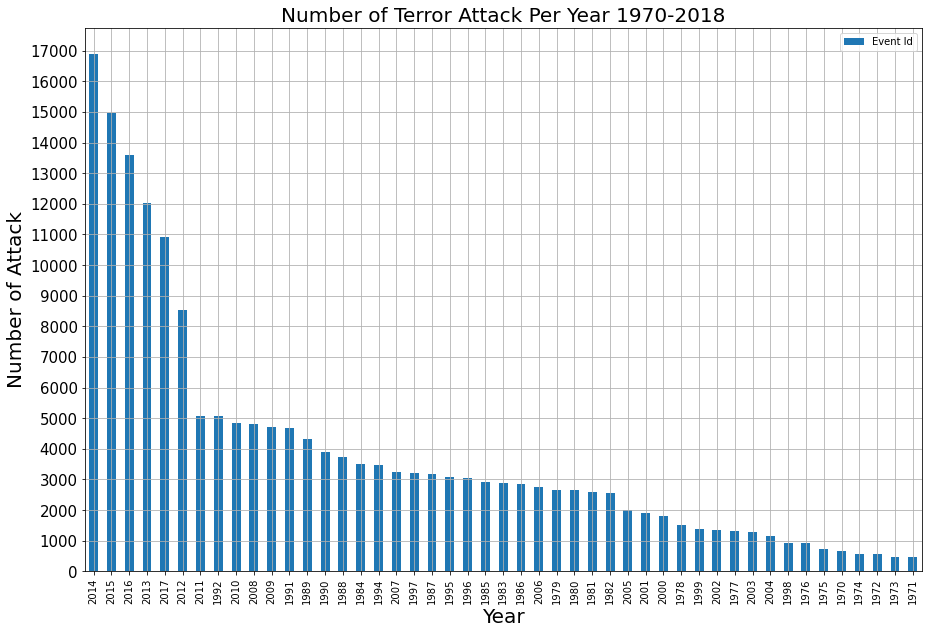

In [81]:
pd.pivot_table(data = df2,index = 'Year',values ='Event Id' ,
               aggfunc='count').sort_values(by='Event Id',ascending=False).plot(kind ='bar',figsize = (15,10))

# figure title
plt.title('Number of Terror Attack Per Year 1970-2018',size = 20)

# x label and y label
plt.ylabel('Number of Attack',size = 20)
plt.xlabel('Year',size = 20)

# x ticks and y ticks
plt.yticks(np.arange(0,18000,1000),size = 15)
plt.grid(True)
plt.show()

In [ ]:
#NUMBER OF TERROR INCIDENT TOOK PLACE (REGION WISE)

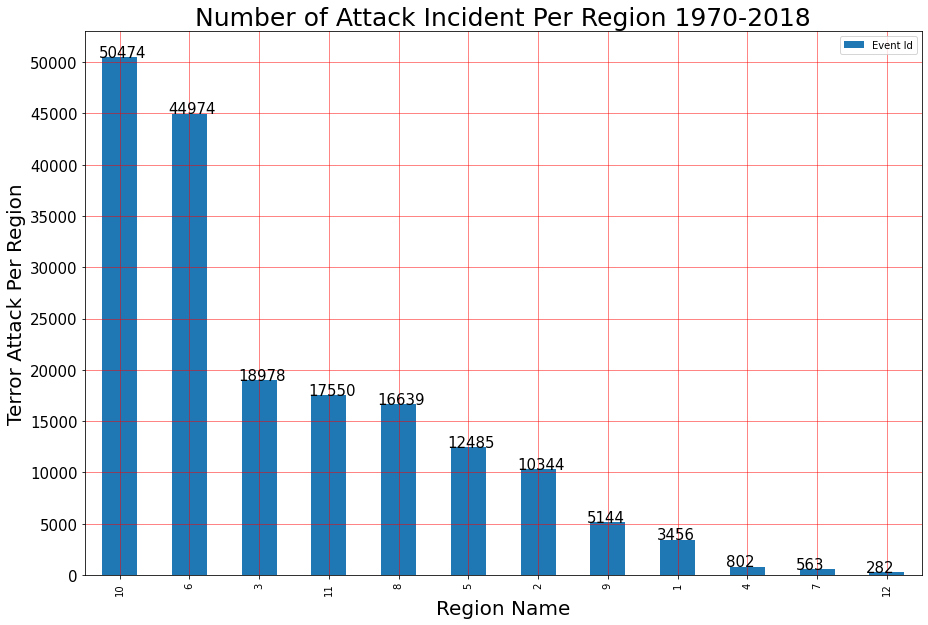

In [83]:
# Creating the Dataframe
xc = pd.pivot_table(data= df2 ,values= 'Event Id', index='Region Name' , aggfunc='count').sort_values(by = 'Event Id',ascending=False)

# Ploting the Value
xc.plot(kind = 'bar',figsize = (15,10))

# Adding value above the bar
for i in range(len(xc)):
    value = xc.iloc[i][0]
    plt.text(x = i-0.3,y = value+15 ,s = f"{value}",fontdict={'size':15})


# Title of the figure
plt.title('Number of Attack Incident Per Region 1970-2018',size = 25)

# ylabel and x label
plt.xlabel('Region Name',size = 20)
plt.ylabel('Terror Attack Per Region',size =20)

# yticks
plt.yticks(np.arange(0,55000,5000),size = 15)

# Grid and Show
plt.grid(True ,color = 'red',alpha = 0.6)
plt.show()

### THANK YOU!!